# Genre Classification

## 1. Import libraries

In [1]:
!pip install torchaudio==0.9.0

import torch
import torch.nn as nn
import torchaudio
import IPython.display as ipd
import matplotlib.pyplot as plt

SR = 16000 #sample rate
eps = 1e-6 # log(0) 을 막기 위함, 0에 너무 가까운 숫자의 경우 0으로 수렴되어서 이를 방지하기 위함. (x+eps)
DEV = "cpu"

     |████████████████████████████████| 1.9 MB 5.1 MB/s 


### Download Dataset

In [2]:
!wget http://opihi.cs.uvic.ca/sound/genres.tar.gz

--2021-10-05 11:53:50--  http://opihi.cs.uvic.ca/sound/genres.tar.gz
Resolving opihi.cs.uvic.ca (opihi.cs.uvic.ca)... 142.104.68.135
Connecting to opihi.cs.uvic.ca (opihi.cs.uvic.ca)|142.104.68.135|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1225571541 (1.1G) [application/x-gzip]
Saving to: ‘genres.tar.gz’

genres.tar.gz       100%[===================>]   1.14G  1.63MB/s    in 12m 7s  

2021-10-05 12:05:58 (1.61 MB/s) - ‘genres.tar.gz’ saved [1225571541/1225571541]



### Unzip Dataset

In [3]:
!tar -xvzf genres.tar.gz

genres/
genres/bextract_single.mf
genres/bl.mf
genres/blues/
genres/cl.mf
genres/classical/
genres/co.mf
genres/country/
genres/di.mf
genres/disco/
genres/hi.mf
genres/hiphop/
genres/input.mf
genres/ja.mf
genres/jazz/
genres/me.mf
genres/metal/
genres/po.mf
genres/pop/
genres/re.mf
genres/reggae/
genres/ro.mf
genres/rock/
genres/rock/rock.00000.wav
genres/rock/rock.00001.wav
genres/rock/rock.00002.wav
genres/rock/rock.00003.wav
genres/rock/rock.00004.wav
genres/rock/rock.00005.wav
genres/rock/rock.00006.wav
genres/rock/rock.00007.wav
genres/rock/rock.00008.wav
genres/rock/rock.00009.wav
genres/rock/rock.00010.wav
genres/rock/rock.00011.wav
genres/rock/rock.00012.wav
genres/rock/rock.00013.wav
genres/rock/rock.00014.wav
genres/rock/rock.00015.wav
genres/rock/rock.00016.wav
genres/rock/rock.00017.wav
genres/rock/rock.00018.wav
genres/rock/rock.00019.wav
genres/rock/rock.00020.wav
genres/rock/rock.00021.wav
genres/rock/rock.00022.wav
genres/rock/rock.00023.wav
genres/rock/rock.00024.wav
g

### Downsample and Save in Pytorch file

- About pathlib

In [4]:
from pathlib import Path

"""
Path 정의
dir_path = 'genres'
blues_path = 'genres/blues'
"""
dir_path = Path('genres/') #Path 클래스로
print(dir_path, dir_path/'blues')

genres genres/blues


In [5]:
file_path = dir_path / 'blues' / 'blues.00000.wav'
file_path.exists() #해당 경로에 파일이 존재하는지?

True

In [6]:
#folder 존재 안 할때
k_pop_path = dir_path / 'k_pop'
if not k_pop_path.exists():
  k_pop_path.mkdir()

### genres 안에 있는 모든 wav 파일 목록 찾기

In [7]:
wav_path = dir_path.rglob('*.wav') #recursive glob
next(iter(wav_path))

PosixPath('genres/jazz/jazz.00014.wav')

In [8]:
wav_path_list = [p for p in wav_path]
wav_path_list

[PosixPath('genres/jazz/jazz.00037.wav'),
 PosixPath('genres/jazz/jazz.00005.wav'),
 PosixPath('genres/jazz/jazz.00061.wav'),
 PosixPath('genres/jazz/jazz.00016.wav'),
 PosixPath('genres/jazz/jazz.00021.wav'),
 PosixPath('genres/jazz/jazz.00028.wav'),
 PosixPath('genres/jazz/jazz.00018.wav'),
 PosixPath('genres/jazz/jazz.00045.wav'),
 PosixPath('genres/jazz/jazz.00047.wav'),
 PosixPath('genres/jazz/jazz.00085.wav'),
 PosixPath('genres/jazz/jazz.00081.wav'),
 PosixPath('genres/jazz/jazz.00025.wav'),
 PosixPath('genres/jazz/jazz.00031.wav'),
 PosixPath('genres/jazz/jazz.00022.wav'),
 PosixPath('genres/jazz/jazz.00055.wav'),
 PosixPath('genres/jazz/jazz.00019.wav'),
 PosixPath('genres/jazz/jazz.00068.wav'),
 PosixPath('genres/jazz/jazz.00038.wav'),
 PosixPath('genres/jazz/jazz.00034.wav'),
 PosixPath('genres/jazz/jazz.00011.wav'),
 PosixPath('genres/jazz/jazz.00082.wav'),
 PosixPath('genres/jazz/jazz.00023.wav'),
 PosixPath('genres/jazz/jazz.00057.wav'),
 PosixPath('genres/jazz/jazz.00052

In [9]:
#파일열기
#다운 샘플링
# 데이터 저장
wav_path = wav_path_list[0]
torchaudio.load(wav_path)

(tensor([[ 0.0503,  0.0433,  0.0014,  ..., -0.2033, -0.2224, -0.2146]]), 22050)

In [13]:
ipd.Audio(audio_smaple_tensor, rate=sample_rate)

In [11]:
audio_smaple_tensor, sample_rate = torchaudio.load(wav_path) #sample 값, sr
print(audio_smaple_tensor.shape, sample_rate) #shape - 모노사운드(1차원, 좌우구분 없음)

torch.Size([1, 661794]) 22050


In [20]:
#다운샘플링
resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq = SR)

In [21]:
downsampled_audio_tensor = resampler(audio_smaple_tensor)

In [22]:
ipd.Audio(downsampled_audio_tensor, rate=SR)

In [23]:
downsampled_audio_tensor.shape

torch.Size([1, 480214])

In [26]:
#길이 확인
print(audio_smaple_tensor.shape[1]/sample_rate)

30.013333333333332


In [29]:
print(wav_path)
print(wav_path.stem) #파일명만
print(wav_path.parent)# 상위 폴더만
print(wav_path.name)#파일 풀로

new_path = wav_path.parent /  (wav_path.stem + '_downsampled.pt')
torch.save(downsampled_audio_tensor, new_path)

genres/jazz/jazz.00037.wav
jazz.00037
genres/jazz
jazz.00037.wav


In [30]:
#같은 작업을 모든 파일에 대해서 수행
resampler = torchaudio.transforms.Resample(22050, SR)
for wav in wav_path_list:
  audio_tensor, orig_sample_rate = torchaudio.load(wav)
  downsampled_audio = resampler(audio_tensor)

  #채널 정보 삭제
  #downsampled_audio.view(-1)
  downsampled_audio = downsampled_audio.squeeze()
  new_path = wav.parent / (wav.stem + '_downsampled.pt')
  torch.save(downsampled_audio, new_path)


# 2. Define Dataset and Dataloader

In [31]:
from torch.utils.data import Dataset, DataLoader

In [46]:
class AudioSet(Dataset):
  def __init__(self, data_dir, sr = SR):
    if not isinstance(data_dir, Path):
      data_dir = Path(data_dir)
    self.load_dataset(data_dir)
    self.sr = sr

  def load_dataset(self, data_dir):
    pt_paths = data_dir.rglob('*.pt') #generator 타입
    pt_paths = list(pt_paths)
    self.audios = [torch.load(pt_fn) for pt_fn in pt_paths]
    self.labels = [pt_fn.stem.split('.')[0] for pt_fn in pt_paths]

    self.label_names = set(self.labels)
    self.name_to_idx = {label : idx for idx, label in enumerate(self.label_names)}    

  def __getitem__(self, idx):
    audio = self.audios[idx][:self.sr * 3]
    label = self.name_to_idx[self.labels[idx]]
    return audio, label

  def __len__(self):
    return len(self.audios)

audioset = AudioSet('genres/')

In [47]:
batch = [audioset[i] for i in range(10)]
batch


[(tensor([-0.0804, -0.1232, -0.1009,  ...,  0.0525,  0.0310, -0.0083]), 0),
 (tensor([ 0.0177,  0.0093,  0.0087,  ..., -0.0299, -0.0284, -0.0185]), 0),
 (tensor([ 0.0046, -0.0117, -0.0039,  ..., -0.0666, -0.0571, -0.0192]), 0),
 (tensor([-0.0100, -0.0189, -0.0038,  ...,  0.0961,  0.0933,  0.0456]), 0),
 (tensor([-0.1158, -0.1471, -0.1216,  ..., -0.0109, -0.0898, -0.1265]), 0),
 (tensor([ 0.0455,  0.0302, -0.0204,  ..., -0.0259, -0.0273, -0.0221]), 0),
 (tensor([ 0.0161,  0.0305,  0.0332,  ...,  0.0198, -0.0107, -0.0080]), 0),
 (tensor([ 0.0450,  0.0728,  0.0559,  ...,  0.0171, -0.0063, -0.0107]), 0),
 (tensor([-0.1336, -0.1855, -0.1799,  ...,  0.1661,  0.1760,  0.1769]), 0),
 (tensor([-0.0081, -0.0077, -0.0039,  ...,  0.0602,  0.0557,  0.0517]), 0)]

## define collate function

In [48]:
def collate_fn(batch):
  audio = torch.stack([x[0] for x in batch])
  label = torch.LongTensor([x[1] for x in batch])
  return audio, label

In [49]:
dataloader = DataLoader(dataset=audioset, batch_size = 64, shuffle=True)

for batch in dataloader:
  print(batch)

[tensor([[-0.0765, -0.0895, -0.0633,  ...,  0.0117,  0.0132,  0.0164],
        [-0.0222, -0.0284, -0.0296,  ...,  0.1976,  0.2544,  0.2497],
        [-0.0557, -0.0506, -0.0109,  ..., -0.0389, -0.0290, -0.0189],
        ...,
        [-0.4706, -0.7754, -0.7213,  ..., -0.0151, -0.1036,  0.0538],
        [-0.1114, -0.1032,  0.1380,  ..., -0.0734, -0.1267, -0.1612],
        [ 0.0259,  0.0098, -0.0096,  ...,  0.0356,  0.0758,  0.0130]]), tensor([1, 2, 3, 0, 3, 1, 4, 3, 7, 5, 3, 8, 1, 9, 6, 0, 7, 6, 6, 0, 0, 8, 7, 6,
        9, 4, 7, 3, 8, 5, 4, 9, 2, 4, 9, 1, 6, 6, 7, 5, 9, 7, 5, 2, 1, 3, 4, 5,
        8, 6, 6, 4, 7, 5, 3, 9, 3, 2, 9, 0, 1, 7, 3, 7])]
[tensor([[ 0.0321,  0.0926,  0.0387,  ...,  0.0134,  0.0520,  0.0147],
        [-0.0389, -0.0694,  0.0199,  ..., -0.0037,  0.0102,  0.0175],
        [-0.0296, -0.1220, -0.0746,  ...,  0.0225,  0.0578, -0.1050],
        ...,
        [-0.1742, -0.2165, -0.0363,  ...,  0.0827,  0.1027,  0.1592],
        [-0.0127,  0.0287,  0.0774,  ..., -0.0237, -

In [68]:
class GenreClassifier(nn.Module):
  def __init__(self, sr):
    super().__init__()

    self.spec_converter = torchaudio.transforms.MelSpectrogram(sample_rate=sr, n_fft=8192, n_mels=48)
    self.db_converter = torchaudio.transforms.AmplitudeToDB()
    self.layer = nn.Sequential(
        nn.Linear(48, 32),
        nn.ReLU(),
        nn.Linear(32, 16),
        nn.ReLU(),
        nn.Linear(16, 10)
    )

  def forward(self, x):
    spec = self.spec_converter(x)
    db = self.db_converter(spec) # B, n_mels, Time_frames

    output = self.layer(db.transpose(-1, -2)) #b, time framse, n_mels
    output = torch.max(output, dim = 1)[0]
    return torch.softmax(output, dim = -1)

model = GenreClassifier(sr=SR)
model



GenreClassifier(
  (spec_converter): MelSpectrogram(
    (spectrogram): Spectrogram()
    (mel_scale): MelScale()
  )
  (db_converter): AmplitudeToDB()
  (layer): Sequential(
    (0): Linear(in_features=48, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=10, bias=True)
  )
)

### Check Our model

In [69]:
test_batch = next(iter(dataloader))
audio, label = test_batch
print(model(audio))

tensor([[2.5245e-05, 9.9278e-05, 1.2047e-04, 2.3936e-03, 9.9108e-01, 1.4352e-04,
         7.0449e-05, 2.2591e-03, 1.7104e-05, 3.7900e-03],
        [4.6112e-06, 1.9605e-05, 1.5097e-05, 4.2840e-04, 9.9830e-01, 1.7254e-05,
         8.1271e-06, 5.5692e-04, 2.2769e-06, 6.5030e-04],
        [3.8674e-05, 4.2980e-05, 3.4601e-05, 1.7084e-03, 9.9505e-01, 5.8183e-05,
         3.0987e-05, 1.0560e-03, 4.5740e-06, 1.9745e-03],
        [2.2123e-05, 4.4251e-05, 4.5209e-05, 1.3919e-03, 9.9599e-01, 3.0267e-05,
         2.0492e-05, 1.3915e-03, 2.9756e-06, 1.0592e-03],
        [2.2123e-05, 4.4251e-05, 4.5209e-05, 1.3919e-03, 9.9599e-01, 3.0267e-05,
         2.0492e-05, 1.3915e-03, 2.9756e-06, 1.0592e-03],
        [8.2653e-04, 4.5021e-04, 4.8541e-04, 7.0345e-03, 9.7986e-01, 6.8878e-04,
         7.8038e-04, 5.0271e-03, 1.7782e-04, 4.6692e-03],
        [4.8359e-04, 2.2862e-03, 1.4129e-03, 6.8961e-03, 9.6942e-01, 6.2614e-04,
         7.6098e-04, 8.2978e-03, 4.7102e-04, 9.3440e-03],
        [5.9288e-05, 3.9633

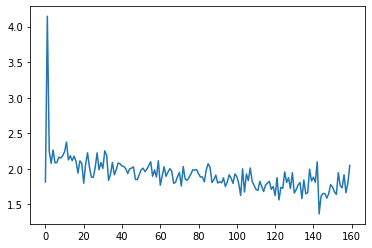

In [71]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
criterion = torch.nn.NLLLoss()
num_epochs = 10
loss_record = []

for epoch in range(num_epochs):

  for audio, label in dataloader:
    pred = model(audio)
    loss = criterion(torch.log(pred+eps), label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_record.append(loss.item())

plt.plot(loss_record)


In [72]:
#데이터 전체 1000개, batch 64
#에폭당 1000//64 + 1번 업데이트
len(loss_record)

160